# **Entorno**

In [425]:
# https://www.properati.com.ar/data
#! wget -O ar_properties.csv.gz -q https://storage.googleapis.com/properati-data-public/ar_properties.csv.gz
#! gzip -d -f ./ar_properties.csv.gz

In [426]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import sklearn as sk
from sklearn import model_selection
from sklearn import ensemble
from sklearn import metrics

import datetime

import warnings
warnings.filterwarnings('ignore')

import re


In [427]:
pd.options.display.max_colwidth = -1

# Lectura de datos

In [428]:
#df_properties = pd.read_csv('../ar_properties.csv', index_col="id")
#df_apred = pd.read_csv('../a_predecir.csv', index_col="id")

In [429]:
df = df_properties.copy()
df_pred = df_apred.copy()

In [430]:
df.head()

,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,l4,...,bathrooms,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type
id,,,,,,,,,,,,,,,,,,,,,
DyVXfkpKygVBKuUk5olH+A==,Propiedad,2020-08-22,2020-09-03,2020-08-22,-34.407468,-58.957367,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,NaN,...,NaN,133139.0,NaN,NaN,NaN,Mensual,VENTA - Lote Industrial 130.000m2 - Parque Industrial Pilar,"Lote (Nro.50) mide 133.139 m2\n<br>Valor: U$S (CONSULTAR)\n<br>\n<br>(Nuevo) PLAZA INDUSTRIAL PILAR (Anexo) del Parque Industrial Pilar.\n<br>El predio cuenta con 200 HA ofreciendo LOTES que van desde los 5.000 hasta 300.000m2.\n<br> FOS: 0.5 / FOT: 1\n<br> Zonificación Industrial (Categoría: 1, 2 y 3).\n<br> Desagues Pluviales\n<br> Tendido Red Eléctrica\n<br> Alumbrado Led de calles\n<br>Sobre Av. Arturo Frondizi entre (Calles 10 y 12), con acceso directo a la Au. Panamericana Ramal Pilar (Ruta 8, Km 61).\n<br>\n<br>CONSULTAR: Depósitos/Locales Llave en Mano (150 a los 1.000m2).\n<br>CONSULTAR: Disponibilidad y Financiamiento.<br><br>Martillero y Corredor Inmobiliario: <br>Walter Angel Tomé<br>CMCPSI 5200 <br>Todas las propiedades son tasadas y bajo normas establecidas en la ley publicamos las propiedades para su comercialización.<br>La intermediación y la conclusión de las operaciones son actividades exclusivas de este matriculado.",Lote,Venta
9naojilaMecJN4jlQiTkGg==,Propiedad,2020-08-22,2020-09-04,2020-08-22,-37.996039,-57.542509,Argentina,Buenos Aires Costa Atlántica,Mar del Plata,NaN,...,NaN,687.0,687.0,NaN,NaN,Mensual,Casa - Santa Cecilia,"Conjunto edilicio de casa y departamentos en block. Casona de 1930, restaurada, con vista al mar. A 30 mts de la costa, cerca de peatonal San Martín y otros puntos turísticos. <br><br>Apto para:<br>1. Vivienda familiar + uso de oficinas dentro del mismo edificio.<br>2. Uso profesional (consultorios, oficinas)<br>3. Alquiler de habitaciones tipo hostel o apart.<br>4. Apto para demoler y construir.<br><br>DETALLES:<br><br>P.B: Espacios comunes, 100 m2. Ingreso, cochera p/3 autos, lavadero, depósito, baño, parque de 134 m2 con parrilla, doble quincho, piscina para niños.<br><br>PRIMER PISO: Dos deptos con vista al mar (opción unificable para armar un único piso) con detalles de calidad, pinotea, piedra, etc.<br>Al frente, dos grandes amb con dormitorios, cocina com, gran living com/recepción, gran tarima de madera de primera, hogar y leñera, catarata decorativa, baño completo, balcón a la calle (89 m2)<br>Al parque, depto de living, cocina grande con balcón terraza (43 m2), dormitorio y baño.<br><br>SEGUNDO PISO: Cinco deptos completos (2 al fte y 3 laterales), todos externos, vista al mar, con baños, bauleras, cocinas y terraza.<br>Depto de 50 m2 (2 amb) + depto de 18 m2 (1 amb) + depto de 26 m2 (1 amb c/balcón) + depto de 33 m2 (2 amb) + depto de 49 m2 (2 amb) c/entrada independiente.<br>Los deptos de 2 amb pueden unificarse para armar uno mas grande, totalmente externo. <br><br>TERCER PISO: Un loft de 168 m2. Living com, 2 baños, sector dormitorios, 2 terrazas, entre piso con gimnasio o sala de estudio), cocina, lavadero, doble entrada, extraordinaria vista al mar y al parque.<br><br><br>SERVICIOS GENERALES:<br><br>Calefacción por radiadores, 2 calderas y 2 termotanques. Grupo electrógeno. Tanque de agua de 3500 lts + reserva de 600 lts. 2 bombas elevadoras y 1 de presión extra. Espacio ascensor-montacargas. Sistema anti incendio. Central telefónica. Alarma. TV satelital. Internet. Iluminación decorativa. <br><br>INSTALACIONES:<br><br>Totalmente equipado y amoblado. Todo en perfecto funcionamiento. Hornos. Anafes. Heladeras. TVs. Mobiliario. Vajilla. Accesorios (NO INCLUIDO EN EL PRECIO DE VENTA INICIAL)",Otro,Venta
tlCPRJPjoDEUzuuCelemAQ==,Propiedad,2020-08-22,2020-08-31,2020-08-22,-31.380187,-58.009182,Argentina,Entre Ríos,Concordia,NaN,...,1.0,80.0,80.0,NaN,NaN,Mensual,Casa - Concordia,"Casa de un dormitorio, cocina, baño, living comedor, lavadero, pati

In [431]:
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1087 entries, 1 to 1087
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ad_type          1087 non-null   object 
 1   start_date       1087 non-null   object 
 2   end_date         1087 non-null   object 
 3   created_on       1087 non-null   object 
 4   lat              1087 non-null   float64
 5   lon              1087 non-null   float64
 6   l1               1087 non-null   object 
 7   l2               1087 non-null   object 
 8   l3               1087 non-null   object 
 9   rooms            1083 non-null   float64
 10  bedrooms         958 non-null    float64
 11  bathrooms        1083 non-null   float64
 12  surface_total    1087 non-null   float64
 13  surface_covered  1087 non-null   float64
 14  price            0 non-null      float64
 15  currency         1087 non-null   object 
 16  price_period     0 non-null      float64
 17  title         

In [432]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000000 entries, DyVXfkpKygVBKuUk5olH+A== to rEynGyGrrsxNeG0ib5vUBA==
Data columns (total 24 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   ad_type          1000000 non-null  object 
 1   start_date       1000000 non-null  object 
 2   end_date         1000000 non-null  object 
 3   created_on       1000000 non-null  object 
 4   lat              894233 non-null   float64
 5   lon              894191 non-null   float64
 6   l1               1000000 non-null  object 
 7   l2               1000000 non-null  object 
 8   l3               965273 non-null   object 
 9   l4               306162 non-null   object 
 10  l5               5530 non-null     object 
 11  l6               0 non-null        float64
 12  rooms            714179 non-null   float64
 13  bedrooms         649933 non-null   float64
 14  bathrooms        765122 non-null   float64
 15  surface_total    477831 non-nul

# Limpieza (Outliers, Nulls, Filtros)

In [433]:
# Me quedo solo con CABA
df = df.loc[df["l1"] == "Argentina"]

## Nulls

Del df entrenamiento vamos a dropear los na en lon y lat

In [434]:
df.dropna(subset=["lon"],inplace=True)
df.dropna(subset=["lat"],inplace=True)
df.dropna(subset=["l3"],inplace = True)
df.dropna(subset=["price"],inplace=True)
df.dropna(subset=["currency"],inplace=True)

Con superficie y los distintos ambientes vamos a completar los nulls

In [435]:
df.drop(df.loc[(df.rooms.isnull()) & (df.bedrooms.isnull()) & (df.bathrooms.isnull()) & (df.surface_total.isnull()) & (df.surface_covered.isnull())].index, inplace=True)

In [436]:
df.rooms.fillna(1,inplace=True)
df_pred.rooms.fillna(1,inplace=True)

df.bedrooms.fillna(0,inplace=True)
df_pred.bedrooms.fillna(0,inplace=True)

df.bathrooms.fillna(0,inplace=True)
df_pred.bathrooms.fillna(0,inplace=True)

Ahora completamos la superficie total y cubierta

In [437]:
df.loc[(df.surface_covered > 0) & (df.surface_total.isnull()),["surface_total"]] = df.loc[(df.surface_covered > 0) & (df.surface_total.isnull()),["surface_covered"]]
df.loc[(df.surface_covered > 0) & (df.surface_total == 0),["surface_total"]] = df.loc[(df.surface_covered > 0) & (df.surface_total.isnull()),["surface_covered"]]
df.loc[(df.surface_total > 0) & (df.surface_covered.isnull()),["surface_covered"]] = 1

In [438]:
df.surface_covered.fillna(1,inplace=True)
df.surface_total.fillna(1,inplace=True)

Completo los nulls de descripcion

In [439]:
df_pred.description.fillna("null",inplace=True)

## Longitud y Latitud

In [440]:
lon_min_max = (58.532674897063565, 58.338011418419356 ) #Limites Este/Oeste de CABA
lat_min_max = (34.7058110012102, 34.531639) #Limites Norte/Sur de CABA

Acomodo lon y lat de los datos a predecir, como no podemos dropear los na y outliers les vamos a asignar el valor que corresponda.

In [441]:
df_pred[["lat","lon"]] = df_pred[["lon","lat"]] # Los invertimos ya que se encontraban al revez

In [442]:
# Establezco el valor absoluto de los campos
df_pred["lon"] = abs(df_pred["lon"]) 
df_pred["lat"] = abs(df_pred["lat"]) 

In [443]:
# Lo que este fuera de la longitu y latitud maxima de CABA es outlier
df_pred["lat_outlier"] = df_pred.lat.apply(lambda x: 0 if (x < lat_min_max[0]) & (x > lat_min_max[1]) else 1)
df_pred["lon_outlier"] = df_pred.lon.apply(lambda x: 0 if (x < lon_min_max[0]) & (x > lon_min_max[1]) else 1)

In [444]:
#Buscamos la longitud y latitud de los outliers según lo que vemos en el titulo de la publicación
df_pred.loc[422,"lat"] = 34.628212
df_pred.loc[873,"lat"] = 34.557626
df_pred.loc[1055,"lat"] = 34.601223
df_pred.loc[1057,"lat"] = 34.557626
df_pred.loc[422,"lon"] = 58.426367
df_pred.loc[873,"lon"] = 58.484324
df_pred.loc[1055,"lon"] = 58.376599
df_pred.loc[1057,"lon"] = 58.484324

df_pred.loc[1057,"lat"] = 34.580921

In [445]:
df_pred.drop(columns=["lat_outlier","lon_outlier"], inplace=True)

Paso lon y lat a absolutos

In [446]:
df["lon"] = abs(df["lon"]) 
df["lat"] = abs(df["lat"]) 

## Barrios

In [447]:
df_pred.loc[(df_pred.l3 == "GBA Norte") | (df_pred.l3 == "2 Ambientes"), ["l3","title"]]

,l3,title
id,,
133,2 Ambientes,"Avenida Coronel Niceto Vega 5100 - PH en Venta en CABA de 51 m2 con 1 dormitorio, 1 baño, a ."
1010,GBA Norte,"Melo Al 4000 - PH en Venta en Vicente López, Vicente López, GBA Norte, Provincia de Buenos Aires de 265 m2 con 4 dormitorios, 3 baños, a ."


Vemos que en el set de datos a predecir hay 2 registros que tienen valores atipicos en el barrio, asi que corregimos.

In [448]:
df_pred.loc[133,["l3"]] = "Palermo"

df_pred.loc[1010,["l3"]] = "Vicente López"

## Precio y moneda

In [449]:
df = df.loc[df.operation_type == "Venta"]

In [450]:
df.drop(df.loc[df.price_period == "Mensual"].index, inplace = True)

In [451]:
df = df.loc[df["currency"] == "USD"]

df.drop(columns = ["currency"], inplace = True )

## Tipo de propiedad

In [452]:
df["property_type_check"] = df.property_type.apply(lambda x: 1 if x in ("Departamento","PH") else 0)

df = df.loc[df["property_type_check"] == 1]

df.drop(columns = "property_type_check", inplace = True)

## Superficie total y cubierta

In [453]:
df.loc[(df.surface_total < 0), ["surface_total"]] = abs(df.loc[(df.surface_total < 0), ["surface_total"]])
df.loc[(df.surface_covered < 0), ["surface_covered"]] = abs(df.loc[(df.surface_covered < 0), ["surface_covered"]])

## Limpieza Palermo

In [454]:
df["Equipado"] = df.description.apply(lambda x: 1 if "equipado" in x.lower() else 0)

In [455]:
df.loc["CaaWrxVeKtQs5gc2KNe1wA==", "price"] = 170000.0

In [456]:
df.drop(df.loc[(df.l3 == "Palermo") & (df["price"] == 9999999)].index , inplace = True)
df.drop(df.loc[(df.l3 == "Palermo") & (df["price"] < 20000)].index , inplace = True)
df.drop(df.loc[(df.Equipado == 1)].index , inplace = True)
df.drop(columns = ["Equipado"], inplace = True)

In [457]:

#df_pred["alquiler"] = df_pred.description.apply(lambda x: 1 if "alquiler" in x.lower() else 0)
#df_pred["alquiler"] = df_pred.description.apply(lambda x: 1 if "alquiler" in x.lower() else 0)


## Limpieza Belgrano

In [458]:
df["block"] = df.description.apply(lambda x: 1 if "venta en block" in x.lower() else 0)
df_pred["block"] = df_pred.description.apply(lambda x: 1 if "venta en block" in x.lower() else 0)

In [459]:
df.loc[df.loc[df.description.str.contains("apto profe[cs]iona[l|es]")].index,["profesionales"]] = 1
df_pred.loc[df_pred.loc[df_pred.description.str.contains("apto profe[cs]iona[l|es]")].index,["profesionales"]] = 1
df.profesionales.fillna(0,inplace=True)
df_pred.profesionales.fillna(0,inplace=True)

In [460]:
df_pred.profesionales.fillna(0,inplace=True)

In [461]:
df["cochera"] = df.description.apply(lambda x: 1 if "cochera en venta" in x.lower() else 0)
df_pred["cochera"] = df_pred.description.apply(lambda x: 1 if "cochera en venta" in x.lower() else 0)

In [462]:
df["duplex"] = df.title.apply(lambda x: 1 if "duplex" in x.lower() else 0)
df_pred["duplex"] = df_pred.title.apply(lambda x: 1 if "duplex" in x.lower() else 0)

In [463]:
df.drop('nKPXW6i6HdJ6JavGppte/Q==', inplace=True)

In [464]:
df.loc["8tdrPoRYiE4KFuqcEQOY/A==",["surface_covered","surface_total"]] = [456.40, 516.97]

In [465]:
patron= "superficie cubierta: ([0-9]+[,.][0-9]+) m2"
df["superficie"] = df.description.apply(lambda texto: re.search(patron,texto.lower()).group() if type(re.search(patron,texto.lower())) == re.Match else "null")

In [466]:
patron= "([0-9]+[,.][0-9]+)"
df["superficie_m2"] = df.superficie.apply(lambda texto: re.search(patron,texto.lower()).group() if type(re.search(patron,texto.lower())) == re.Match else 0)

In [467]:
df["superficie_m2"] = df["superficie_m2"].str.replace(",",".")
df["superficie_m2"].fillna(0,inplace=True)
df['superficie_m2'] = df['superficie_m2'].astype(float)

In [468]:
df.loc[(df["superficie_m2"] > 1)&(df.surface_covered == 1), "surface_covered"] = len(df.loc[(df["superficie_m2"] > 1)&(df.surface_covered == 1), "superficie_m2"])
df.drop(columns=["superficie","superficie_m2"], inplace=True)

In [469]:
df["m2"] = df.price/df.surface_covered

In [470]:
df.loc["id832qtR6K3gvrfMzc5Gfw==",["rooms","bedrooms","bathrooms"]]

rooms        5.0
bedrooms     0.0
bathrooms    7.0
Name: id832qtR6K3gvrfMzc5Gfw==, dtype: object

In [471]:
df["room_m2"] = df.surface_covered/df.rooms

In [472]:
df.loc[(df.l3 == "Belgrano")&(df.room_m2 == 21220.0),"description"]

id
qLC4I45gTS2gy5KzUzBifQ==    Corredor Responsable: Gustavo Guastello - C.U.C.I.C.B.A 869Contacto: Karina Melgar - MLS ID # 420241168-41FABULOSO DEPARTAMENTO DE 3 AMBIENTES CON DEPENDENCIA CON COCHERA Y BAULERA<br><br>SUMAMENTE SILENCIOSO Y  LUMINOSO. AMPLIA VISTA A PULMON DE MANZANA. ORIENTACION NORTE<br>Amplio departamento de dos dormitorios y dependencia totalmente alfombrado, baño completo y toilette con ducha. Cocina con barra para comidas rápidas. Actualmente trabaja un estudio contable. Cuenta con instalación de gas sin suministro del mismo debido a que su uso profesional prescindía del mismo. Se puede negociar algunos de sus muebles. La unidad cuenta con baulera  individual y espacio guardacoches en subsuelo. Calefacción central.<br>Expensas $10.000<br><br>EXCELENTE UBICACIÓN: A SOLO 150mts DE Av. CABILDO y A 200mts DE PLAZA MANUEL BELGRANO Y PLAZA NORUEGA. A MANOS DE 10 CUADRAS DE LA ESTACIÓN BELGRANO C DEL FERROCARRIL MITRE. ZONA PURAMENTE COMERCIAL<br><br>Colectivos: 29, 41

In [473]:
len(df.loc[(df.l3 == "Belgrano")&(df["surface_covered"] == 1), "m2"])

2576

In [474]:
df.loc[(df.l3 == "Belgrano"),"m2"].max()

2200000.0

In [475]:
df.loc[(df.l3 == "Belgrano")&(df.m2 == 5500000)]

,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,l4,...,title,description,property_type,operation_type,block,profesionales,cochera,duplex,m2,room_m2
id,,,,,,,,,,,,,,,,,,,,,


In [476]:
df.loc[(df.l3 == "Belgrano"),"m2"]

id
R3xPLfk6R32yJEiCO+U5YA==    82500.000000 
EDKkf/Loke8bnpRyWY1Y2Q==    95000.000000 
J9RfQFTU1Txal9yllTNneQ==    115000.000000
7/z2H+zYHrtDuu/43d06DQ==    135000.000000
X9Y96i5k/2P5z9KLoZlNYw==    175000.000000
                                ...      
F4y8NoLRUaIDl+yFbu4TMA==    2590.769231  
mTGff4XFOXpfWX0MKF4wdA==    4536.363636  
GjgpUqQ7My+U3qSTLBGjLQ==    2391.304348  
qfURKRHP2iQbN/NeN7QBQA==    3005.128205  
YjYRvt6eJTVC9ySjOCrxTw==    2448.979592  
Name: m2, Length: 5790, dtype: float64

In [477]:
df.drop(columns=["m2","room_m2"], inplace=True)

## Limpieza Recoleta

## Limpieza Núñez

## Limpieza Puerto Madero

## Elimino las columnas que no utilizo

In [478]:
df.drop(columns = ["ad_type","l4","l5", "l6", "created_on","start_date", "end_date","l1","l2","price_period","operation_type"], inplace = True )

In [479]:
df.drop_duplicates(inplace = True)

In [480]:
df_pred.drop(columns = ["ad_type","l4","l5", "l6", "created_on","start_date", "end_date","l1","l2","price_period","operation_type","currency","price_period","services"], inplace = True )
#df_pred.drop(columns = ["title","description","details","additionals"], inplace = True)

# Feature Engineering

Uno los dos data frames

In [481]:
df_total = pd.concat([df,df_pred], axis=0)

## Additionals

Genero dummies con los additionals y lo agrego en el df

In [482]:
df_pred.additionals.fillna("zxzyzjz", inplace = True)
df_pred.additionals_split = df_pred.additionals.apply(lambda x: x.split(","))

In [483]:
additionals_list = df_pred.additionals_split.explode().unique()
additionals_list = [x.strip() for x in additionals_list]
additionals_list = list(dict.fromkeys(additionals_list))
additionals_list.append("Subte")
additionals_list.append("Parrilla")

In [484]:
df_total.description.fillna("sin_descripcion", inplace = True)

In [485]:
for additional in additionals_list:
    df_total[additional] = df_total.description.apply(lambda x: 1 if additional.lower() in x.lower() else 0)

In [486]:
df_total.drop(columns = "zxzyzjz", inplace = True)
df_total.drop(columns = "additionals", inplace = True)
df_total.drop(columns = "description", inplace = True)

## Dummies

In [487]:
df_total.select_dtypes(include = "object").columns

Index(['l3', 'title', 'property_type', 'details'], dtype='object')

In [489]:
df_total.drop(columns=['title', 'details'], inplace=True)

In [490]:
df_total = pd.get_dummies(df_total, columns = [ "property_type"])

## Dividimos los DF

In [491]:
df = df_total[df_total.index.isin(df.index)]
df_pred = df_total[df_total.index.isin(df_pred.index)]

In [492]:
barrios = df_pred.l3.unique()

df["barrio_ok"] = df.l3.apply(lambda x: 1 if x in barrios else 0)

df = df.loc[df["barrio_ok"] == 1]

df.drop(columns = "barrio_ok", inplace = True)

In [493]:
barrios

array(['Balvanera', 'Villa Urquiza', 'Palermo', 'Belgrano', 'Floresta',
       'Villa Pueyrredon', 'Saavedra', 'Villa Devoto', 'San Nicolás',
       'Chacarita', 'Villa Crespo', 'Boedo', 'Flores', 'Paternal', 'Boca',
       'Recoleta', 'Caballito', 'Nuñez', 'Constitución', 'Colegiales',
       'San Telmo', 'Monserrat', 'Puerto Madero', 'Villa del Parque',
       'Almagro', 'Villa Ortuzar', 'Villa Lugano', 'San Cristobal',
       'Barracas', 'Liniers', 'Mataderos', 'Villa Santa Rita',
       'Parque Patricios', 'Parque Chas', 'Villa General Mitre', 'Retiro',
       'Parque Avellaneda', 'Monte Castro', 'Parque Chacabuco',
       'Villa Luro', 'Versalles', 'Coghlan', 'Vélez Sarsfield',
       'Nueva Pompeya', 'Agronomía', 'Villa Real', 'Vicente López'],
      dtype=object)

# Modelización

## Entrenamiento

### Split RandomForest

In [ ]:
barrios_null = []

mejores_parametros = dict()

for barrio in barrios:

    try:

        X = df.loc[df.l3 == barrio][df.columns.drop(['price',"l3"])]
        y = df.loc[df.l3 == barrio,"price"]

        X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

        ne = 0
        md = 0
        m_score = 999999

        for n_estimators in [50, 100, 500, 1000, 3000]:               

            for max_depth in [3, 5, 10, 20, 50]:
            
                reg = sk.ensemble.RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, n_jobs=-1, random_state=42)

                # Entrenamos el modelo
                reg.fit(X_train, y_train)

                # Predecimos
                y_pred = reg.predict(X_test)

                # Medimos la performance de la predicción
                score = sk.metrics.mean_squared_error(y_test, y_pred, squared=False)

                if m_score > score:
                
                    m_score=score
                    ne = n_estimators
                    md = max_depth

                else:

                    continue            

        print(f"{barrio},{ne},{md},{m_score}")

        mejores_parametros[barrio] = [ne,md]

    except:

        barrios_null.append(barrio)
        

### Gradient Boosting

In [499]:
X = df[df.columns.drop(['price',"l3"])]
y = df["price"]

X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

for n_estimators in [50, 100, 500, 1000, 3000]:               
    
    for max_depth in [3, 5, 7, 10]:
    
        reg = sk.ensemble.GradientBoostingRegressor(n_estimators=n_estimators, max_depth=max_depth,  random_state=42)
        
        # Entrenamos el modelo
        reg.fit(X_train, y_train)
        
        # Predecimos
        y_pred = reg.predict(X_test)
        
        # Medimos la performance de la predicción
        score = sk.metrics.mean_squared_error(y_test, y_pred, squared=False)
    
        print(f"n_{n_estimators} | max_depth: {max_depth} | score: {score}")
    print(f"------------------------------------------------------------------\n")
            
            

n_50 | max_depth: 3 | score: 107825.04931617774
n_50 | max_depth: 5 | score: 98785.86906923148
n_50 | max_depth: 7 | score: 89551.941197954
n_50 | max_depth: 10 | score: 87681.11248392847
------------------------------------------------------------------

n_100 | max_depth: 3 | score: 103207.44249231863
n_100 | max_depth: 5 | score: 95285.23983231153
n_100 | max_depth: 7 | score: 87295.18091129597
n_100 | max_depth: 10 | score: 86096.3255776988
------------------------------------------------------------------

n_500 | max_depth: 3 | score: 93439.27285709721
n_500 | max_depth: 5 | score: 89490.20709468082
n_500 | max_depth: 7 | score: 84183.07024820967
n_500 | max_depth: 10 | score: 84982.29249655362
------------------------------------------------------------------

n_1000 | max_depth: 3 | score: 90016.83165610532
n_1000 | max_depth: 5 | score: 88457.65603356555
n_1000 | max_depth: 7 | score: 83760.86323278389
n_1000 | max_depth: 10 | score: 85038.97410271315
-------------------------

## Predicción para Kaggle


### Split RandomFores

In [496]:
# genero un df resultados para concatenar las respuesta y despues ordenarlo para la solucion final
df_respuestas = pd.DataFrame()

for barrio in barrios:

    df_temp = pd.DataFrame()

    if barrio in barrios_null:
        
        X = df[df.columns.drop(['price',"l3"])]
        y = df["price"]
        X_pred = df_pred.loc[df_pred.l3 == barrio][df_pred.columns.drop(['price',"l3"])]

        df_temp["id"] = X_pred.index    

        n_estimators = 500
        max_depth = 10

        # Entrenamiento
        reg = sk.ensemble.RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=42, n_jobs=-1)

        # Entrenamos el modelo
        reg.fit(X, y)

        # predicción
        df_temp["price"] = reg.predict(X_pred)   

        df_respuestas = pd.concat([df_respuestas , df_temp], axis=0)        

    else:

        X = df.loc[df.l3 == barrio][df.columns.drop(['price',"l3"])]
        y = df.loc[df.l3 == barrio,"price"]
        X_pred = df_pred.loc[df_pred.l3 == barrio][df_pred.columns.drop(['price',"l3"])]

        df_temp["id"] = X_pred.index

        # los mejores hiperparámetros encontrados antes
        n_estimators = mejores_parametros[barrio][0]
        max_depth = mejores_parametros[barrio][1]

        # Entrenamiento
        reg = sk.ensemble.RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=42, n_jobs=-1)

        # Entrenamos el modelo
        reg.fit(X, y)

        # predicción
        df_temp["price"] = reg.predict(X_pred)
                
        df_respuestas = pd.concat([df_respuestas , df_temp], axis=0) 

        #if barrio == "Palermo":
        #    print(len(df_respuestas))
        #    break
        

In [497]:
df_respuestas.set_index("id", drop=True, inplace=True)
df_respuestas.sort_index(axis=0, inplace=True)

In [498]:
# Grabo la solución
df_respuestas[["price"]].to_csv("../Soluciones/rfc_solucion.csv")


### Gradient Boosting

In [500]:
X = df[df.columns.drop(['price',"l3"])]
y = df["price"]
X_pred = df_pred[df_pred.columns.drop(['price',"l3"])]

n_estimators = 3000
max_depth = 7

gbm = sk.ensemble.GradientBoostingRegressor(n_estimators=n_estimators, max_depth=max_depth,  random_state=42)

# Entrenamos el modelo
gbm.fit(X, y)

# predicción
df_pred["price"] = gbm.predict(X_pred)

In [501]:
# Grabo la solución
df_pred[["price"]].to_csv("../Soluciones/gbm_solucion.csv")

## Analisis de resultados

In [89]:
importances = reg.feature_importances_

sorted_indices = np.argsort(importances)[::-1]

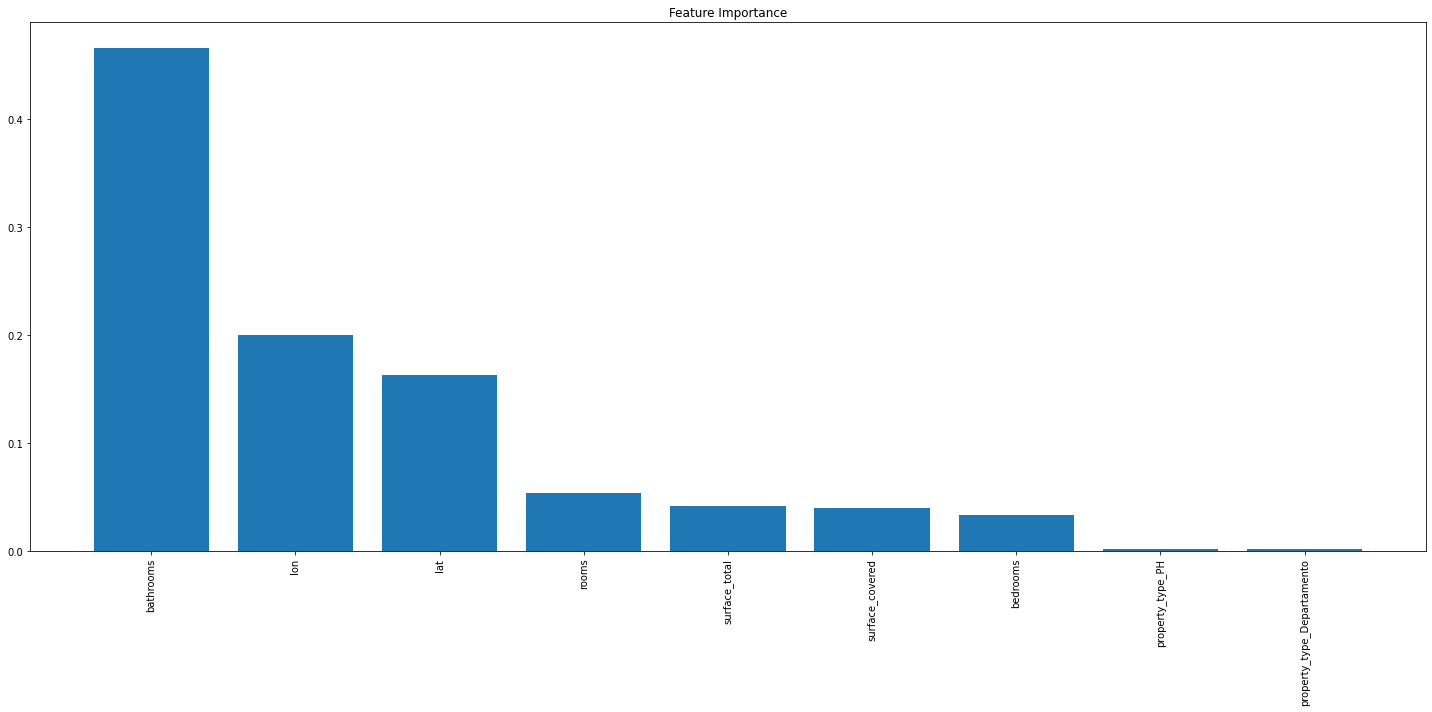

In [90]:
f,a = plt.subplots(figsize=(20,10))
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()